In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import simtk.openmm as mm
from torsionfit import TorsionScanSet as ScanSet
import torsionfit.TorsionFitModel as Model
from torsionfit import sqlite_plus
from pymc import MCMC
from parmed.charmm import CharmmParameterSet
from torsionfit import plots
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np

In [3]:
param = CharmmParameterSet('../../../../param/top_all36_cgenff.rtf',
                           '../../../../../data/charmm_ff/par_all36_cgenff.prm')
structure = '../../../../structure/butane_charge_off.psf'
scan = '../../../../torsion_scans/DFT_b3lyp/butane_scan_b3lyp_360.log'
butane_scan = ScanSet.parse_psi4(scan, structure)
butane_scan.compute_energy(param)

In [4]:
model = Model.TorsionFitModelEliminatePhase(param, butane_scan, decouple_n=True,
                                            param_to_opt=[('CG331', 'CG321', 'CG321', 'CG331')])

In [5]:
db = sqlite_plus.load('butane_360_4_mult_off_charge_on.db')

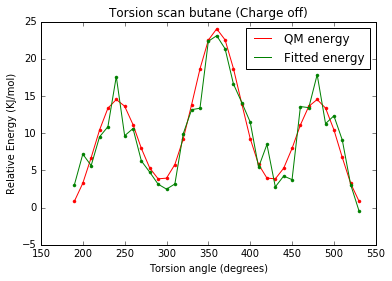

In [10]:
#plt.plot(butane_scan.steps, butane_scan.mm_energy, 'b', label='CharMM energy')
#plt.plot(butane_scan.steps, butane_scan.mm_energy, 'b.')
plt.plot(butane_scan.steps, butane_scan.qm_energy, 'r', label= 'QM energy')
plt.plot(butane_scan.steps, butane_scan.qm_energy, 'r.')
plt.plot(butane_scan.steps, db.mm_energy[-1], 'g', label='Fitted energy')
plt.plot(butane_scan.steps, db.mm_energy[-1], 'g.')
plt.ylabel('Relative Energy (KJ/mol)')
plt.xlabel('Torsion angle (degrees)')
plt.title('Torsion scan butane (Charge off)')
plt.legend()
plt.savefig('Torsion_scan.pdf')

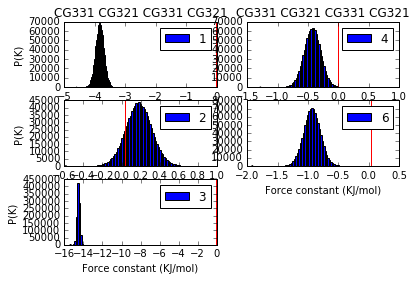

In [9]:
plt.title("CG331 CG321 CG331 CG321")

plt.subplot(3, 2, 1)
plt.hist(db.CG331_CG321_CG321_CG331_1_K[:], bins=100, label='1')
plt.axvline(0, color='r', linewidth=3)
plt.legend()
plt.ylabel('P(K)')
plt.title("CG331 CG321 CG331 CG321")

plt.subplot(3, 2, 3)
plt.hist(db.CG331_CG321_CG321_CG331_2_K[:], bins=100, label='2')
plt.axvline(0.038, color='r')
plt.legend()
plt.ylabel('P(K)')

plt.subplot(3, 2, 5)
plt.hist(db.CG331_CG321_CG321_CG331_3_K[:], bins=100, label='3')
plt.axvline(0, color='r', linewidth=3)
plt.legend()
plt.ylabel('P(K)')
plt.xlabel('Force constant (KJ/mol)')

plt.subplot(3, 2, 2)
plt.hist(db.CG331_CG321_CG321_CG331_4_K[:], bins=100, label='4')
plt.title("CG331 CG321 CG331 CG321")
plt.axvline(0, color='r')
plt.legend()

plt.subplot(3, 2, 4)
plt.hist(db.CG331_CG321_CG321_CG331_6_K[:], bins=100, label='6')
plt.axvline(0.032, color='r')
plt.legend()
plt.xlabel('Force constant (KJ/mol)')

plt.savefig('parameter_hist.pdf')

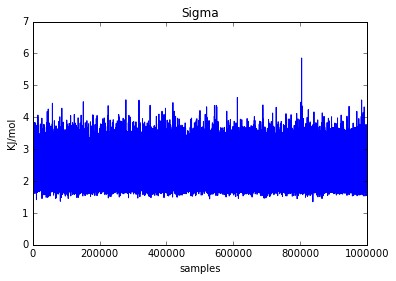

In [11]:
plt.plot(np.exp(db.log_sigma[:]), label='sigma')
plt.title('Sigma')
plt.savefig('sigma.pdf')
plt.xlabel('samples')
plt.ylabel('KJ/mol')